                                    Data Visualization and Pre-processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Load the dataset

In [2]:
df=pd.read_csv("Churn_modelling.csv")

3 a) Univariate Analysis

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['CreditScore'].mean()

650.5288

In [5]:
df['CreditScore'].median()

652.0

In [6]:
df['CreditScore'].std()

96.65329873613035

In [7]:
df['CreditScore'].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

In [8]:
import matplotlib.pyplot as plt

C:\Users\rakshana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

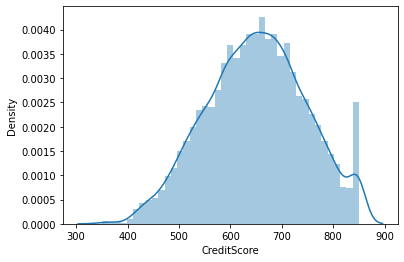

In [11]:
sns.distplot(df['CreditScore'])

Bivariate Analysis

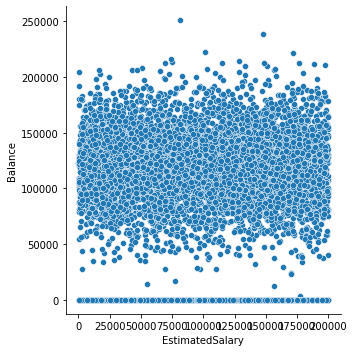

In [12]:
sns.relplot(x='EstimatedSalary',y="Balance", data=df)

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

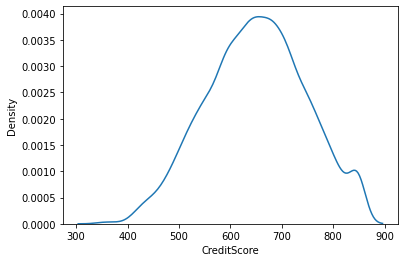

In [13]:
sns.kdeplot(df['CreditScore'])

Multivariate Analysis

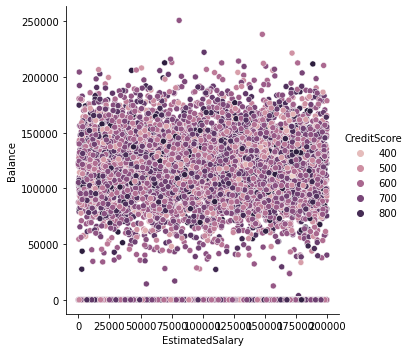

In [13]:
sns.relplot(x='EstimatedSalary',y="Balance", hue = "CreditScore", data=df)

Descriptive Statistics

In [14]:
df['Exited'].sum()

2037

In [15]:
df['Age'].mean()

38.9218

In [16]:
df['EstimatedSalary'].std()

57510.49281769816

In [17]:
df['EstimatedSalary'].median()

100193.915

In [19]:
print("max=",df['CreditScore'].max(),"min=",df['CreditScore'].min())

max= 850 min= 350


Handling missing values

In [21]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
df['CreditScore'].fillna(df['CreditScore'].mean())

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

Outliers

C:\Users\rakshana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

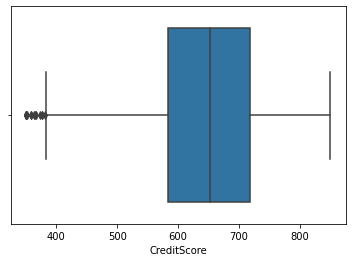

In [24]:
sns.boxplot(df['CreditScore'])

In [25]:
percentile25 = df['CreditScore'].quantile(0.25)
percentile75 = df['CreditScore'].quantile(0.75)
iqr=percentile75-percentile25

In [26]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df[df['CreditScore'] > upper_limit]
df[df['CreditScore'] < lower_limit]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,8155,15791533,Ch'ien,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


In [28]:
new_df = df[(df['CreditScore'] < upper_limit) & (df['CreditScore']>lower_limit)]
new_df.shape

(9984, 14)

C:\Users\rakshana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

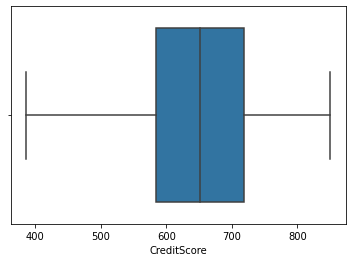

In [29]:
sns.boxplot(new_df['CreditScore'])

C:\Users\rakshana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

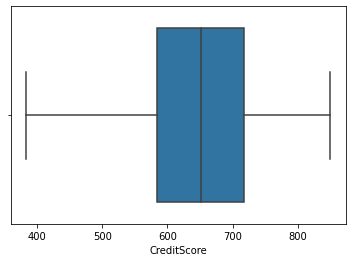

In [31]:
new_df_cap = df.copy()
new_df_cap['CreditScore'] = np.where(
    new_df_cap['CreditScore'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['CreditScore'] < lower_limit,
        lower_limit,
        new_df_cap['CreditScore']
    )
)
sns.boxplot(new_df_cap['CreditScore'])

Check for Categorical columns and perform encoding

In [32]:
df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


Split the data into dependent and independent variables.

In [33]:
x=df.loc[:, ['CreditScore', 'HasCrCard','IsActiveMember']]
y=df.loc[:,'Exited']

Split the data into training and testing

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=0)

In [36]:
x_train

,CreditScore,HasCrCard,IsActiveMember
7809,579,1,1
5279,652,1,1
3279,652,1,0
8984,645,1,0
8466,613,0,0
...,...,...,...
9225,594,1,1
4859,794,1,1
3264,738,1,0
9845,590,1,1


In [37]:
x_test

,CreditScore,HasCrCard,IsActiveMember
9394,597,1,1
898,523,1,0
2398,706,1,1
5906,788,0,0
2343,706,1,1
...,...,...,...
4758,493,1,0
9914,496,1,0
7067,746,0,1
4578,691,0,0


In [38]:
y_train

7809    1
5279    0
3279    0
8984    0
8466    0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 6000, dtype: int64

In [39]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
4758    0
9914    0
7067    0
4578    0
4202    0
Name: Exited, Length: 4000, dtype: int64